## Lab 01 Step 00 : Importing Packages

In [1]:
#0.Importing required packages 
import pandas as pd
import matplotlib.pyplot as plt #(plotin histograms in cell #3)
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats

## Lab 01 Step 01 : Choosing subsample

In [2]:
#1.Reading Data and printing head
energydata = pd.read_csv("./energydata_complete.csv")
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [95]:
#2.Creating subsamples
#2.1.Choosing five continous colomns
sample_energydata=energydata[[ 'T2', 'RH_2' ,'T5','T6','T_out']]
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)

##############################

#2.Creating subsamples
#2.1.Choosing five continous colomns
#2.2. Randomly choosing rows (50% from the original data. original samples 19,735 Rows)
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)
df_sample_energydata=df_sample_colomn_energydata.sample(frac = 0.5)

## Lab 01 Step 02 Part 01: Non-parametric estimation of PDF in form of histogram 

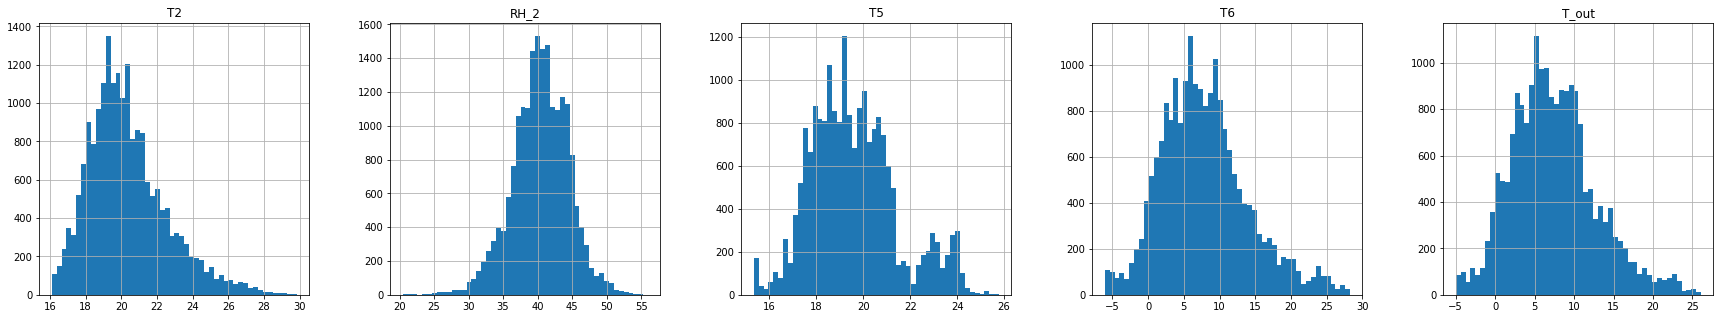

In [96]:
#3.For each variable: non-parametric estimation of PDF in form of histogram and using kernel density function (ploted next to each other)
fig, axes = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(30, 5))
for col, axis in zip(df_sample_colomn_energydata.columns, axes):
    df_sample_colomn_energydata.hist(column = col, bins = 50, ax=axis)

## Lab 01 Step 02 Part 02: Non-parametric estimation of PDF kernel density function (continous RV)

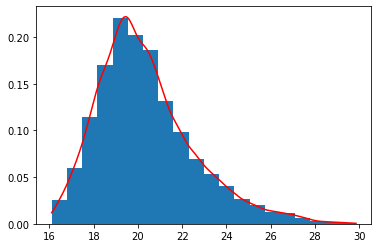

In [97]:
col_App = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[0]].to_numpy()
density = kde.gaussian_kde(col_App)
xgrid = np.linspace(col_App.min(), col_App.max(),500)
ygrid=density.evaluate(xgrid)
plt.hist(col_App, bins=20,density=True, stacked=True)
plt.plot(xgrid, ygrid, 'r-')

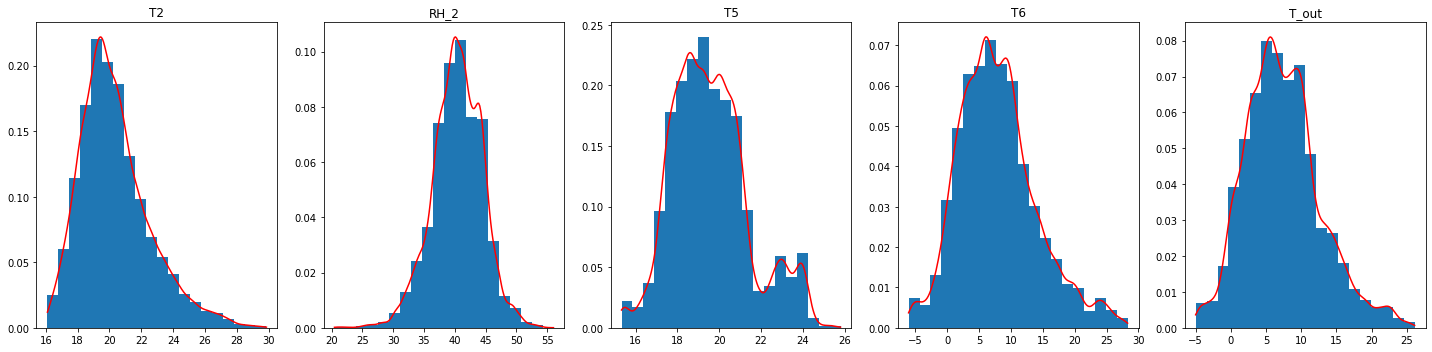

In [98]:
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)// 5,5, figsize=(20, 5))
i=0
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()
    density = kde.gaussian_kde(col)
    xgrid = np.linspace(col.min(), col.max(), 200)
    ax.hist(col, bins=20,density=True, stacked=True)
    ax.plot(xgrid, density(xgrid), 'r-')
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i!=4) :
        i+=1
plt.tight_layout()

## Lab 01 Step 03 : Estimation of order statistics and representing them as “box with whiskers” plot.

In [114]:
#03.01 function to type the labels of the order statics parameters
def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')
    return [median,pc25,pc75,capbottom,captop]

[6.92, 3.67, 10.4, -5.0, 20.4]

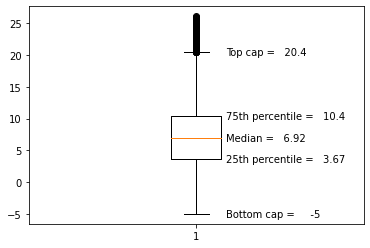

In [115]:
#03.02 plotting box with whiskers for one column
one_col = df_sample_colomn_energydata[df_sample_colomn_energydata.columns[4]].to_numpy()
fig, ax = plt.subplots()
# Create the boxplot and store the resulting python dictionary
boxplot=plt.boxplot(one_col)
# Call the function to make labels
make_labels(ax, boxplot)

╒═════════════╤══════════╤═════════╤═════════╤══════════════╤═══════════╕
│             │  Median  │  PC25   │  PC75   │  Cap Bottom  │  Cap Top  │
╞═════════════╪══════════╪═════════╪═════════╪══════════════╪═══════════╡
│ Appliances  │    20    │  18.79  │  21.5   │     16.1     │  25.5625  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T2          │   40.5   │  37.9   │  43.26  │    29.89     │   51.29   │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ RH_2        │  19.39   │ 18.2775 │ 20.6196 │    15.33     │  24.1267  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ T_out       │   7.3    │ 3.62667 │ 11.256  │    -6.065    │  22.6967  │
├─────────────┼──────────┼─────────┼─────────┼──────────────┼───────────┤
│ Press_mm_hg │   6.92   │  3.67   │  10.4   │      -5      │   20.4    │
╘═════════════╧══════════╧═════════╧═════════╧══════════════╧═══════════╛


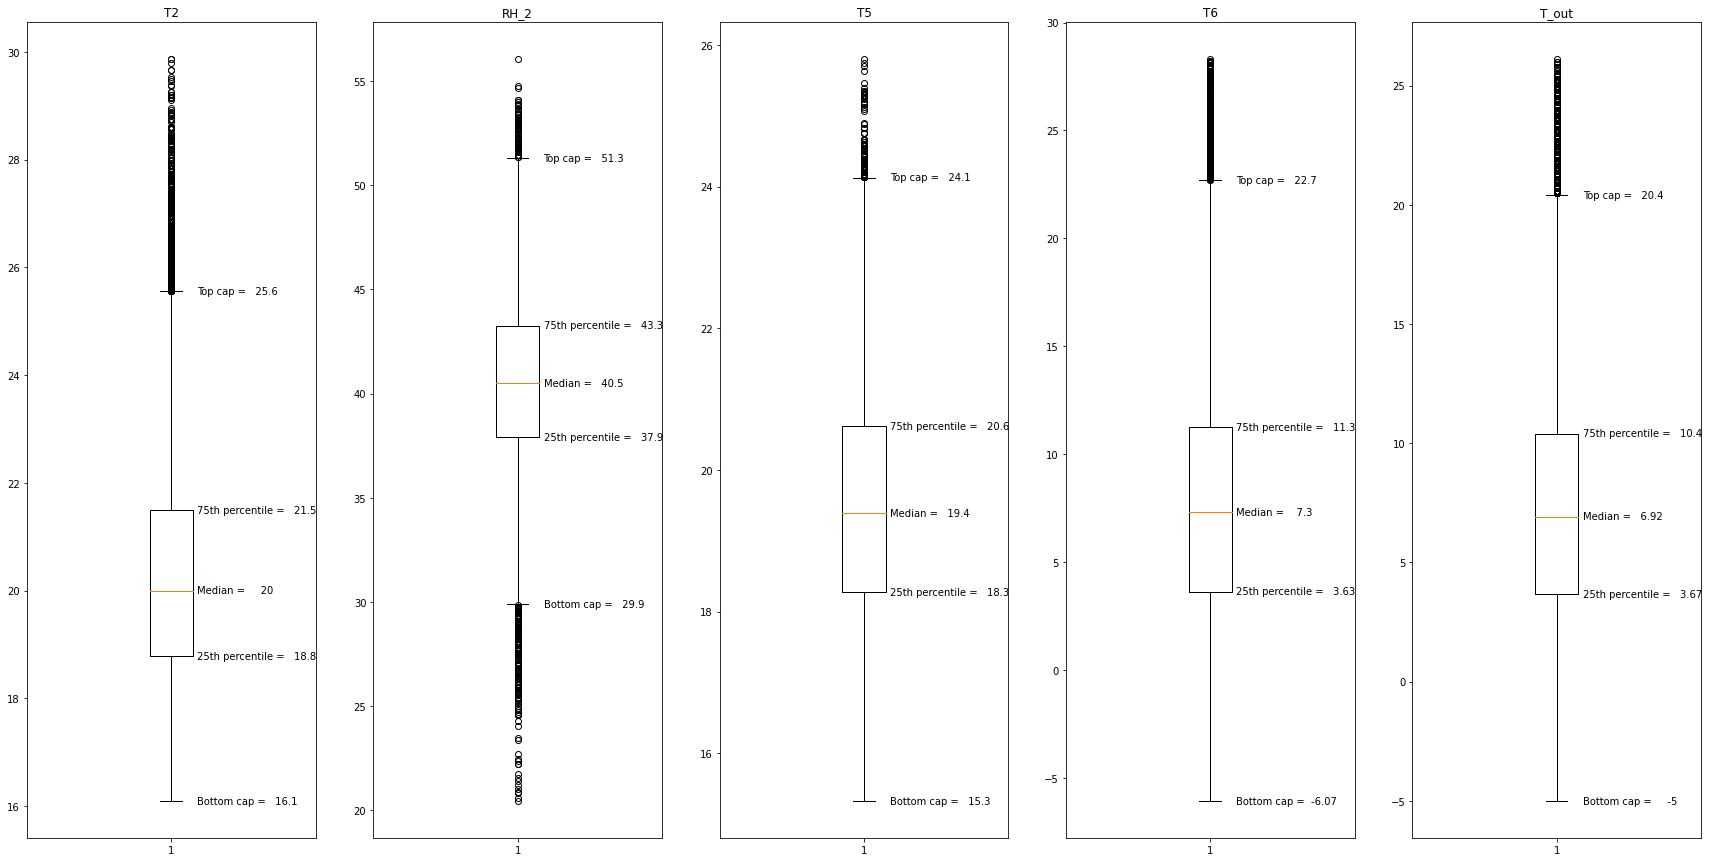

In [122]:
#03.03 plotting box with whiskers for all variables column and printing order statistics 
fig, axs = plt.subplots(len(df_sample_colomn_energydata.columns)//5,5, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    col=df_sample_colomn_energydata[df_sample_colomn_energydata.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(df_sample_colomn_energydata.columns[i])
    if (i<4):
        i+=1
    parameters.append(make_labels(ax, bp))
#printing a table with order statistics.
rowIDs=['Appliances','T2','RH_2','T_out','Press_mm_hg']
print(tabulate(parameters, headers=['Median','PC25','PC75','Cap Bottom','Cap Top'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))


## Lab 01 Step 04 : Theoretical distributions that describe the sample on a basis of non-parametric analysis results

All positive.

Gamma T2 = Temperature /biased to left/ --> Gamma / Normal (Gaussian)

Normal RH_2 = Humidity /Centered/ --> Normal  (Gaussian)

Gamma T_out = Temperature /biased to left/ --> Gamma

Gamma Press_mm_hg = Pressure /biased to right/ -->  Normal (Gaussian)

T5

Gamma T6 = Temperature outside north. /biased to left/ --> Gamma

## Lab 01 Step 05 : Estimating parameters of chosen distributions using method of maximum likelihood and method of Least sequare error


### Lab 01 step 05 : all variables' distributions, both ways: MM and MLE. And p-value through kstest

T2  exponnorm  MM parameters:1.1748449157597527,18.67345507468565,1.4250752410513376  Kstest:1.0941862161123751e-12
T2  exponnorm  MLE parameters:1.6547201645534417,18.406605889555912,1.1730528500523134  Kstest:0.04356300919390266
RH_2  exponnorm  MM parameters:0.6006344839295767,38.339301874140055,3.4624377895174367  Kstest:1.3171691857565914e-09
RH_2  exponnorm  MLE parameters:0.0005762548234248996,40.41323340457835,4.090085247825389  Kstest:2.95253727659155e-06
T5  exponnorm  MM parameters:0.8535603794634943,18.397329393860822,1.4106286199824267  Kstest:2.4517421735518962e-15
T5  exponnorm  MLE parameters:1.1857890084865064,18.146965421333427,1.226518696813029  Kstest:1.347556660785116e-08
T6  exponnorm  MM parameters:0.8900934396432961,3.869511295272545,4.575068719860131  Kstest:0.0004368422639089653
T6  exponnorm  MLE parameters:1.1023492605037901,3.3338579053114827,4.180035203604289  Kstest:0.0563834292456572
T_out  exponnorm  MM parameters:0.838709453168811,3.991321823946723,4.1

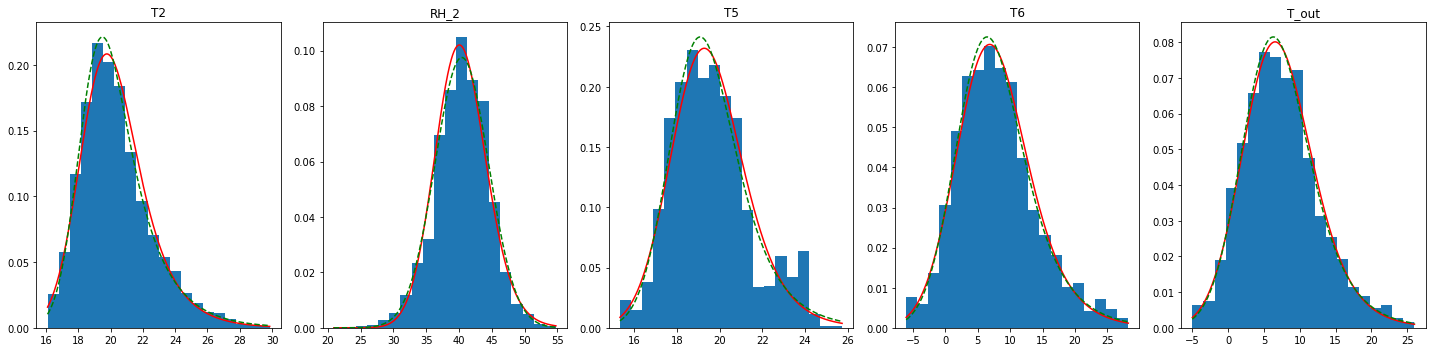

In [124]:
fig, axs = plt.subplots(len(df_sample_energydata.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['exponnorm','exponnorm','exponnorm','exponnorm','exponnorm']
index=0
for ax in axs.ravel():
    colomn_name=df_sample_energydata.columns[index]
    col = df_sample_energydata[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

### Lab 01 Step 05 each variable individually

(1.1748449157597527, 18.67345507468565, 1.4250752410513376)
(1.6547201645534417, 18.406605889555912, 1.1730528500523134)
Ttest_indResult(statistic=206.20200729106367, pvalue=0.0)
Ttest_indResult(statistic=206.19948802476895, pvalue=0.0)
1.0941862161123751e-12
0.04356300919390266


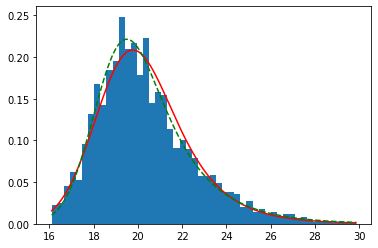

In [ ]:
nbins_T2=50
col_T2=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
max_T2=col_T2.max()
axis_T2=np.linspace(col_T2.min(), col_T2.max(),500)
x_T2 = stats.exponnorm  #.rvs(a, b, size=1000, random_state=123)
MM_T2 = x_T2.fit(col_T2,method='MM')
print(MM_T2)
dist_MM_T2 = x_T2.pdf(axis_T2, *MM_T2)
MLE_T2 = x_T2.fit(col_T2,method='MLE')
print(MLE_T2)
dist_MLE_T2 = x_T2.pdf(axis_T2, *MLE_T2)
fig_T2, ax_T2 = plt.subplots()
ax_T2.hist(col_T2, nbins_T2,density=True, stacked=True)
ax_T2.plot(axis_T2, dist_MM_T2 ,'-r', label='norm_MM')  #* len(col) * smax / nbins
ax_T2.plot(axis_T2, dist_MLE_T2,'--g', label='norm_MLE') #* len(col) * smax / nbins

pValue_MM_T2=stats.ttest_ind(col_T2, dist_MM_T2)
pValue_MLE_T2=stats.ttest_ind(col_T2, dist_MLE_T2)
print(pValue_MM_T2)
print(pValue_MLE_T2)

_, kstest = stats.kstest(col_T2, 'exponnorm', MM_T2, N=100)
_, kstest2 = stats.kstest(col_T2, 'exponnorm', MLE_T2, N=100)
print(kstest)
print(kstest2)

### Above I tried already all available distributions and none has a pvalue >0.05. That is why moving to detecting the outliers and replace them with mean value.

### Data triming outliers

In [118]:
#detecting outliers and eliminate them (their value becomes NAN)
Q1=df_sample_colomn_energydata.quantile(0.25)
Q3 = df_sample_colomn_energydata.quantile(0.75)
IQR = Q3-Q1

print (IQR)

dataClean = df_sample_colomn_energydata[~((df_sample_colomn_energydata < (Q1-IQR * 1.5)) |(df_sample_colomn_energydata > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape
dataClean

T2       2.710000
RH_2     5.360000
T5       2.342143
T6       7.629333
T_out    6.730000
dtype: float64


,T2,RH_2,T5,T6,T_out
0,19.200000,44.790000,17.166667,7.026667,6.60
1,19.200000,44.722500,17.166667,6.833333,6.48
2,19.200000,44.626667,17.166667,6.560000,6.37
3,19.200000,44.590000,17.166667,6.433333,6.25
4,19.200000,44.530000,17.200000,6.366667,6.13
...,...,...,...,...,...
19730,NaN,42.025714,23.200000,NaN,NaN
19731,NaN,42.080000,23.230000,NaN,NaN
19732,NaN,42.768571,23.230000,NaN,NaN
19733,25.414000,43.036000,23.200000,22.433333,NaN


In [119]:
#Replacing NAN values with mean value.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

dataImp

,T2,RH_2,T5,T6,T_out
0,19.200000,44.790000,17.166667,7.026667,6.600000
1,19.200000,44.722500,17.166667,6.833333,6.480000
2,19.200000,44.626667,17.166667,6.560000,6.370000
3,19.200000,44.590000,17.166667,6.433333,6.250000
4,19.200000,44.530000,17.200000,6.366667,6.130000
...,...,...,...,...,...
19730,20.157433,42.025714,23.200000,7.456671,7.068772
19731,20.157433,42.080000,23.230000,7.456671,7.068772
19732,20.157433,42.768571,23.230000,7.456671,7.068772
19733,25.414000,43.036000,23.200000,22.433333,7.068772


T2  gamma  MM parameters:15.911308764886899,12.59170049772609,0.47549403027298254  Kstest:7.155193808769019e-19
T2  gamma  MLE parameters:10.630658020779236,13.943652217379372,0.5845153140196346  Kstest:1.1653388857481722e-11
RH_2  exponnorm  MM parameters:0.6731763037454981,38.38810876104573,3.128006297733313  Kstest:3.728587231637326e-18
RH_2  exponnorm  MLE parameters:0.000629592388083564,40.48908239879875,3.808450267991142  Kstest:1.2035092244591037e-05
T5  exponnorm  MM parameters:0.8315444795488822,18.407191272812796,1.3712546051721368  Kstest:9.295325790290272e-23
T5  exponnorm  MLE parameters:1.0798768759359172,18.211579092964897,1.237024694945245  Kstest:8.612318950986811e-15
T6  exponnorm  MM parameters:0.6118286496294203,4.629883443737608,4.620223934325219  Kstest:3.6644892348300955e-09
T6  exponnorm  MLE parameters:0.6632647697601387,4.44576013232459,4.53951804057872  Kstest:3.6871970569908437e-07
T_out  exponnorm  MM parameters:0.5610061855162076,4.7191935465600885,4.18814

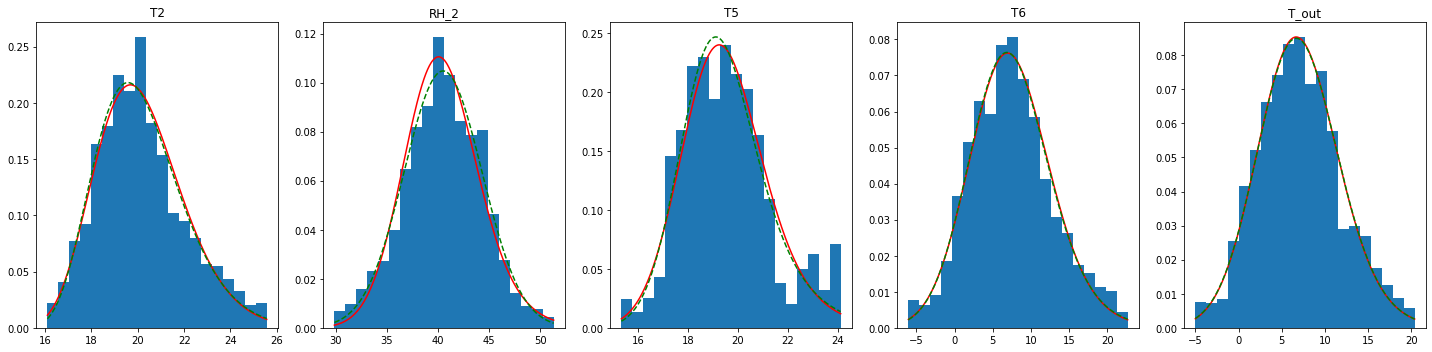

In [127]:
# trying the distributions after trimming the outliers
fig, axs = plt.subplots(len(dataImp.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['gamma','exponnorm','exponnorm','exponnorm','exponnorm']
index=0
for ax in axs.ravel():
    colomn_name=dataImp.columns[index]
    col = dataImp[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

╒═════════════╤══════════╤═════════╤════════╤══════════════╤═══════════╕
│             │  Median  │  PC25   │  PC75  │  Cap Bottom  │  Cap Top  │
╞═════════════╪══════════╪═════════╪════════╪══════════════╪═══════════╡
│ Appliances  │    20    │  18.79  │ 21.26  │     16.1     │  24.9633  │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ T2          │ 40.4915  │   38    │  43.2  │     30.2     │    51     │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ RH_2        │  19.39   │ 18.2775 │  20.6  │    15.33     │   24.08   │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ T_out       │   7.3    │ 3.62667 │ 10.69  │    -6.065    │  21.2633  │
├─────────────┼──────────┼─────────┼────────┼──────────────┼───────────┤
│ Press_mm_hg │   6.92   │  3.67   │  10.1  │      -5      │   19.7    │
╘═════════════╧══════════╧═════════╧════════╧══════════════╧═══════════╛


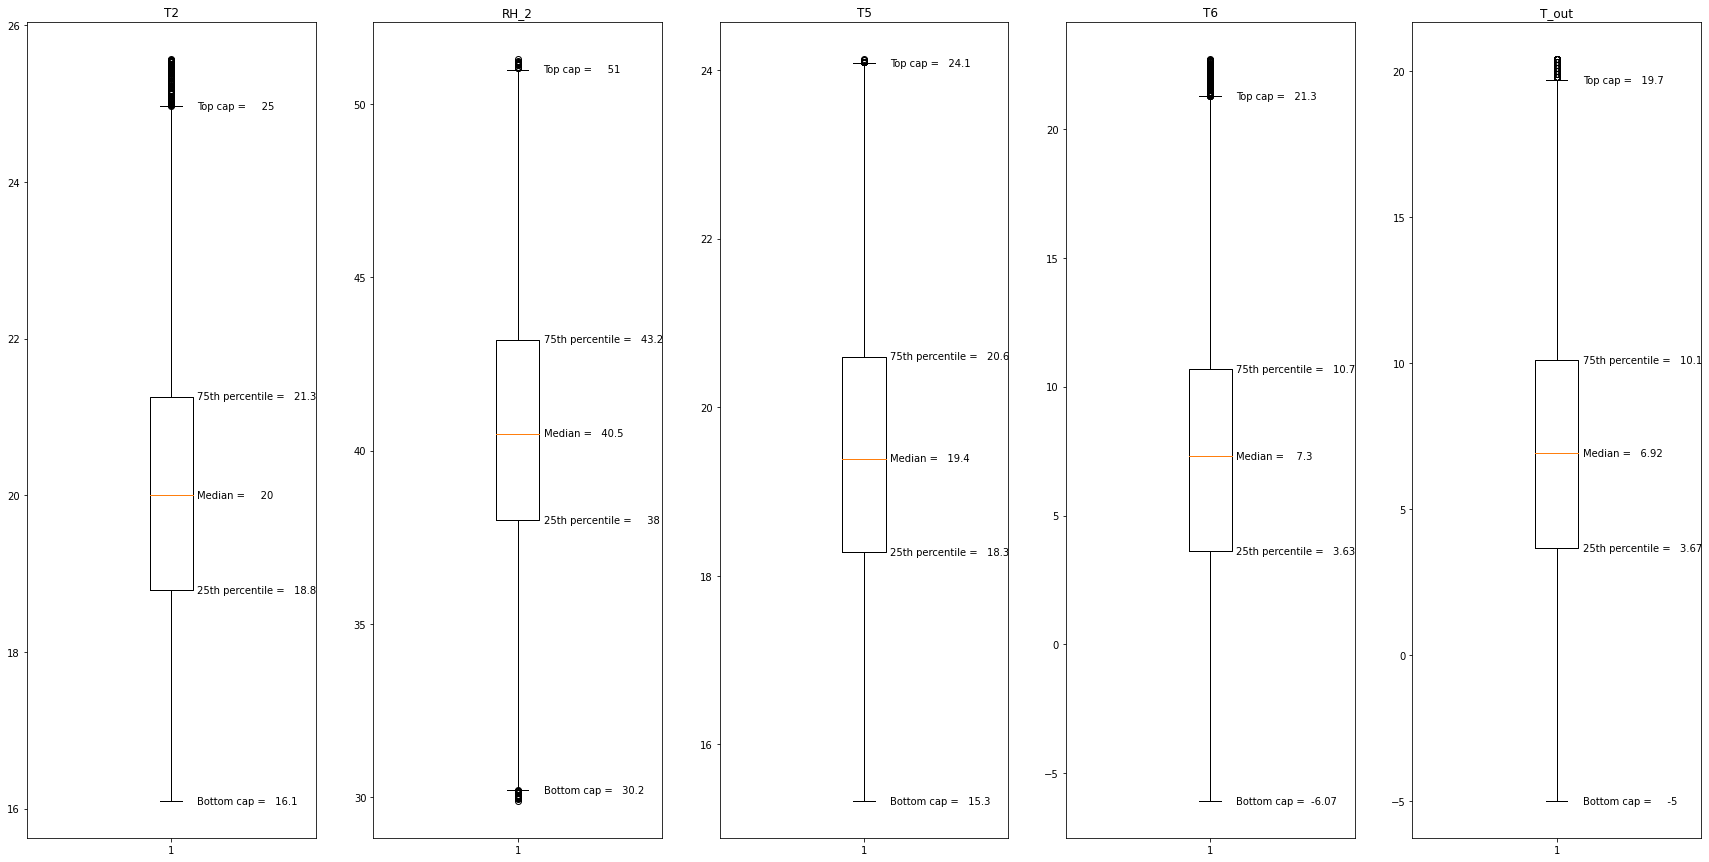

In [121]:
# checking the box with whiskers plots after trimming the data
# plotting box with whiskers for all variables column and printing order statistics 
fig, axs = plt.subplots(len(dataImp.columns)//5,5, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    col=dataImp[dataImp.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(dataImp.columns[i])
    if (i<4):
        i+=1
    parameters.append(make_labels(ax, bp))
#printing a table with order statistics.
rowIDs=['Appliances','T2','RH_2','T_out','Press_mm_hg']
print(tabulate(parameters, headers=['Median','PC25','PC75','Cap Bottom','Cap Top'],  tablefmt='fancy_grid',numalign ='center',showindex=rowIDs))

#### finding distributions

Trying to find suitable distribution after replacing the outliers with the mean value. Non of the distributions get pvalue >0.05

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp.columns[0:]:
        try:
            dist = getattr(stats, d)
            # # boxcox
            #feature = stats.boxcox(df_sample_energydata[c])
            #param = dist.fit(feature[0])
            #_, kstest = stats.kstest(feature[0], d, param, N=100)
            #_, chisq = stats.chisquare(feature[0])

            # original
            feature = dataImp[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

alpha


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


anglit
arcsine
argus
beta


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


betaprime


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:801: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:805: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.75.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.5.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.583333333333332.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.055555555555554.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous

expon
exponnorm
exponweib


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:1727: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


exponpow
f
fatiguelife
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3614: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


gamma
gengamma
genhalflogistic


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2951: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2952: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp


genhyperbolic


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]


geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


johnsonsb
johnsonsu
kappa4
kappa3
ksone


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:105: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:108: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


kstwobign
laplace
laplace_asymmetric
levy
levy_l
logistic
loggamma
loglaplace


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


lognorm
loguniform
lomax
maxwell
mielke


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5629: RuntimeWarning: overflow encountered in power
  return x**k / (1.0+x**s)**(k*1.0/s)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5629: RuntimeWarning: invalid value encountered in true_divide
  return x**k / (1.0+x**s)**(k*1.0/s)


moyal
nakagami
ncx2
ncf


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


nct


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6405: RuntimeWarning: overflow encountered in multiply
  / np.asarray(fac1*sc.gamma((n+1)/2)))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6407: RuntimeWarning: overflow encountered in multiply
  / np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1)))


norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:7320: RuntimeWarning: divide by zero encountered in log1p
  return np.log(2/np.pi) + 0.5*np.log1p(-x*x)


skewcauchy
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:8352: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy


In [125]:

top_T2 = df_dist[df_dist['T2_kstest'] >= 0.05].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2 = df_dist[df_dist['RH_2_kstest'] >= 0.05].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out = df_dist[df_dist['T_out_kstest'] >= 0.05].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5 = df_dist[df_dist['T5_kstest'] >= 0.05].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6 = df_dist[df_dist['T6_kstest'] >= 0.05].sort_values(by=['T6_kstest'], ascending=False).reset_index()

In [126]:

print(top_T2)
print(top_RH_2)
print(top_T_out)
print(top_T5)
print(top_T6)


Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, R

In [ ]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp.columns[0:]:
        try:
            dist = getattr(stats, d)
            # # boxcox
            #feature = stats.boxcox(df_sample_energydata[c])
            #param = dist.fit(feature[0])
            #_, kstest = stats.kstest(feature[0], d, param, N=100)
            #_, chisq = stats.chisquare(feature[0])

            # original
            feature = dataImp[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

alpha


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


anglit
arcsine
argus
beta


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


betaprime


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:801: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:805: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.75.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.5.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.583333333333332.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.055555555555554.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous

expon
exponnorm
exponweib


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:1727: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


exponpow
f
fatiguelife
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3614: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


gamma
gengamma
genhalflogistic


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2951: RuntimeWarning: divide by zero encountered in power
  tmp0 = tmp**(limit-1)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2952: RuntimeWarning: invalid value encountered in multiply
  tmp2 = tmp0*tmp


genhyperbolic


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]


geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


johnsonsb
johnsonsu
kappa4
kappa3
ksone


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:105: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:108: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


kstwobign
laplace
laplace_asymmetric
levy
levy_l
logistic
loggamma
loglaplace


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


lognorm
loguniform
lomax
maxwell
mielke


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5629: RuntimeWarning: overflow encountered in power
  return x**k / (1.0+x**s)**(k*1.0/s)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5629: RuntimeWarning: invalid value encountered in true_divide
  return x**k / (1.0+x**s)**(k*1.0/s)


moyal
nakagami
ncx2
ncf


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


nct


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6405: RuntimeWarning: overflow encountered in multiply
  / np.asarray(fac1*sc.gamma((n+1)/2)))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6407: RuntimeWarning: overflow encountered in multiply
  / np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1)))


norm
norminvgauss
pareto
pearson3
powerlaw
powerlognorm


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6856: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:7320: RuntimeWarning: divide by zero encountered in log1p
  return np.log(2/np.pi) + 0.5*np.log1p(-x*x)


skewcauchy
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:8352: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy


In [62]:
print(top_T6)

   index distribution                                          T2_params  \
0     18    exponnorm  (1.6948325573732554, 18.379929555194458, 1.164...   
1     25  genlogistic  (35.14382935695595, 13.1687490074535, 1.743617...   

   T2_kstest  T2_chi2                                        RH_2_params  \
0   0.017749      1.0  (0.0005392619555001387, 40.41497148261008, 4.1...   
1   0.000736      1.0  (0.7846199048563327, 41.32881726579947, 2.1085...   

   RH_2_kstest  RH_2_chi2                                       T_out_params  \
0     0.000038        1.0  (1.0006544684798833, 3.656963252380575, 3.7986...   
1     0.000004        1.0  (2.960493374416993, 1.8384539569868243, 3.7994...   

   T_out_kstest  T_out_chi2  \
0      0.017313         0.0   
1      0.003403         0.0   

                                         RH_6_params   RH_6_kstest  RH_6_chi2  \
0  (0.0005818283568664398, 54.66934889387795, 31....  3.420836e-61        0.0   
1  (1.9843984123776683e-07, 99.90010971027573

In [56]:
print(df_dist)

     distribution                                          T2_params  \
0           alpha  (6.6102727763664735, 6.783939493476769, 87.474...   
1          anglit            (21.97116819534623, 10.041838135710975)   
2         arcsine           (16.099999999999998, 13.768808529180607)   
3           argus  (2.2231386160226176e-05, 12.14920400643582, 17...   
4            beta  (5.672490736751861, 10640.703989524485, 15.162...   
..            ...                                                ...   
93  vonmises_line  (2.693723864006069, 20.188252876151765, 3.0775...   
94           wald            (15.901056114971414, 5.669784190222369)   
95    weibull_min  (0.7395140240895671, 16.099999999999998, 1.478...   
96    weibull_max  (32.63385230870607, 77.32073034810534, 57.9553...   
97     wrapcauchy  (0.002657655814212689, 16.099999997063904, 2.1...   

       T2_kstest  T2_chi2                                        RH_2_params  \
0   1.160939e-05      1.0  (27.081164943046616, -71.853

### Above I tried already all available distributions for trimmed and non trimmed data and none has a pvalue >0.05. That is why moving to normalizing.

### Normalizing

In [128]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(df_sample_colomn_energydata), columns=df_sample_colomn_energydata.columns)
dataTrans.head()

#eliminating outliers
Q1_Trans=dataTrans.quantile(0.25)
Q3_Trans = dataTrans.quantile(0.75)
IQR_Trans = Q3_Trans-Q1_Trans

dataClean_Trans = dataTrans[~((dataTrans < (Q1_Trans-IQR_Trans * 1.5)) |(dataTrans > (Q3_Trans + IQR_Trans*1.5)))]
dataClean_Trans.head()
dataClean_Trans.shape

#filling NAN with mean
imputer = SimpleImputer(strategy='mean')
dataImp_Trans = pd.DataFrame(imputer.fit_transform(dataClean_Trans), columns=dataClean_Trans.columns)
dataImp_Trans.head()

,T2,RH_2,T5,T6,T_out
0,0.225345,0.684038,0.175506,0.381070,0.372990
1,0.225345,0.682140,0.175506,0.375443,0.369132
2,0.225345,0.679445,0.175506,0.367487,0.365595
3,0.225345,0.678414,0.175506,0.363800,0.361736
4,0.225345,0.676727,0.178691,0.361859,0.357878


T2  norm  MM parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
T2  norm  MLE parameters:0.2949430211977356,0.13787477169394197  Kstest:1.2501640697817105e-74
RH_2  norm  MM parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
RH_2  norm  MLE parameters:0.5631685481856682,0.10708927001058872  Kstest:1.2041232009241543e-05
T5  norm  MM parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T5  norm  MLE parameters:0.40300267776223175,0.17047952538953395  Kstest:5.234154394521535e-37
T6  norm  MM parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T6  norm  MLE parameters:0.39358669375496047,0.157658939737616  Kstest:2.2157674121238125e-25
T_out  norm  MM parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21
T_out  norm  MLE parameters:0.3880634107931598,0.15441160416664507  Kstest:6.256053165735105e-21


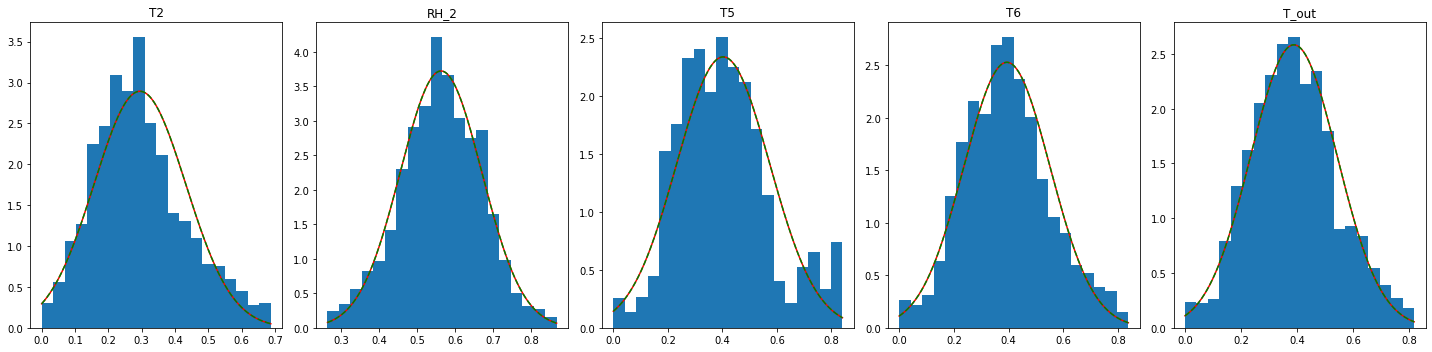

In [130]:
# trying the distributions after normalizing and trimming the outliers
fig, axs = plt.subplots(len(dataImp_Trans.columns)// 5,5, figsize=(20, 5))
i=0
nbins=20
dists=['norm','norm','norm','norm','norm']
index=0
for ax in axs.ravel():
    colomn_name=dataImp_Trans.columns[index]
    col = dataImp_Trans[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    x = getattr(stats, dists[index])
    MM = x.fit(col,method='MM')
    dist_MM = x.pdf(axis, *MM)
    MLE = x.fit(col,method='MLE')
    dist_MLE = x.pdf(axis, *MLE)

    #fig_T2, ax_T2 = plt.subplots()
    ax.hist(col, nbins,density=True, stacked=True)
    ax.plot(axis, dist_MM ,'-r', label='norm_MM')  #* len(col) * smax / nbins
    ax.plot(axis, dist_MLE,'--g', label='norm_MLE') #* len(col) * smax / nbins
    ax.set_title(colomn_name)

    #pValue_MM_T2=stats.ttest_ind(col, dist_MM_T2)
    #pValue_MLE_T2=stats.ttest_ind(col, dist_MLE_T2)
    #print(pValue_MM_T2)
    #print(pValue_MLE_T2)

    _,  kstest = stats.kstest(col, dists[index], MM, N=100)    
    _, kstest2 = stats.kstest(col, dists[index], MLE, N=100)
    print(colomn_name+'  '+dists[index] +'  MM parameters:'+ ','.join([str(i) for i in MM])+'  Kstest:'+str(kstest))
    print(colomn_name+'  '+dists[index] +'  MLE parameters:'+','.join([str(i) for i in MLE])+'  Kstest:'+str(kstest2))
    
    if (index!=4) :
        index+=1
plt.tight_layout()

In [131]:
dist_name = ['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford',\
        'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',\
        'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'f',\
        'fatiguelife', 'foldcauchy', 'foldnorm', 'genlogistic', 'gennorm', 'genpareto',\
        'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic',\
        'genhyperbolic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l',\
        'halfcauchy', 'halflogistic', 'halfnorm', 'halfgennorm', 'hypsecant', 'invgamma',\
        'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',\
        'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l',\
        'logistic', 'loggamma', 'loglaplace', 'lognorm', 'loguniform',\
        'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm',\
        'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',\
        'rdist', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 'skewcauchy',\
        'skewnorm', 't', 'trapezoid', 'triang', 'truncexpon',\
        'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',\
        'weibull_min', 'weibull_max', 'wrapcauchy']

df_dist = []
for d in dist_name:
    print(d)
    dct = {
            'distribution': d
    }
    for c in dataImp_Trans.columns[0:]:
        try:
            dist = getattr(stats, d)
            # # boxcox
            #feature = stats.boxcox(df_sample_energydata[c])
            #param = dist.fit(feature[0])
            #_, kstest = stats.kstest(feature[0], d, param, N=100)
            #_, chisq = stats.chisquare(feature[0])

            # original
            feature = dataImp_Trans[c]
            param = dist.fit(feature)
            _, kstest = stats.kstest(feature, d, param, N=100)
            _, chisq = stats.chisquare(feature)
                    
            dct['{}_params'.format(c)] = param
            dct['{}_kstest'.format(c)] = kstest
            dct['{}_chi2'.format(c)] = chisq
        except:
            continue
    
    df_dist.append(dct)
    
df_dist = pd.DataFrame(df_dist)

alpha


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


anglit
arcsine
argus
beta


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


betaprime


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:801: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:805: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


bradford
burr
burr12
cauchy
chi
chi2
cosine
crystalball
dgamma
dweibull
erlang


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.75.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.25.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.5.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 14.875.
  RuntimeWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:2807: RuntimeW

expon
exponnorm
exponweib
exponpow
f
fatiguelife
foldcauchy
foldnorm
genlogistic
gennorm
genpareto
genexpon
genextreme
gausshyper
gamma
gengamma
genhalflogistic
genhyperbolic
geninvgauss
gilbrat
gompertz
gumbel_r
gumbel_l
halfcauchy
halflogistic
halfnorm
halfgennorm
hypsecant
invgamma
invgauss
invweibull
johnsonsb
johnsonsu
kappa4
kappa3
ksone


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:105: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:108: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


kstwobign
laplace
laplace_asymmetric
levy


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


levy_l
logistic
loggamma
loglaplace


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


lognorm
loguniform
lomax
maxwell
mielke
moyal
nakagami
ncx2
ncf
nct


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:6405: RuntimeWarning: overflow encountered in multiply
  / np.asarray(fac1*sc.gamma((n+1)/2)))


norm
norminvgauss


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:4154: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:4156: RuntimeWarning: invalid value encountered in multiply
  return fac1 * sc.k1e(a * sq) * np.exp(b*x - a*sq) / sq
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:4154: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


pareto
pearson3
powerlaw
powerlognorm
powernorm
rdist
rayleigh
rice
recipinvgauss
semicircular


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:7320: RuntimeWarning: divide by zero encountered in log1p
  return np.log(2/np.pi) + 0.5*np.log1p(-x*x)


skewcauchy
skewnorm
t
trapezoid
triang
truncexpon
truncnorm
tukeylambda


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_continuous_distns.py:8352: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


uniform
vonmises
vonmises_line
wald
weibull_min
weibull_max
wrapcauchy


In [140]:
top_T2 = df_dist[df_dist['T2_kstest'] >= 0.01].sort_values(by=['T2_kstest'], ascending=False).reset_index()

top_RH_2 = df_dist[df_dist['RH_2_kstest'] >= 0.01].sort_values(by=['RH_2_kstest'], ascending=False).reset_index()

top_T_out = df_dist[df_dist['T_out_kstest'] >= 0.01].sort_values(by=['T_out_kstest'], ascending=False).reset_index()

top_T5 = df_dist[df_dist['T5_kstest'] >= 0.01].sort_values(by=['T5_kstest'], ascending=False).reset_index()

top_T6 = df_dist[df_dist['T6_kstest'] >= 0.01].sort_values(by=['T6_kstest'], ascending=False).reset_index()


print(top_T2)
print(top_RH_2)
print(top_T_out)
print(top_T5)
print(top_T6)

Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, RH_2_kstest, RH_2_chi2, T5_params, T5_kstest, T5_chi2, T6_params, T6_kstest, T6_chi2, T_out_params, T_out_kstest, T_out_chi2]
Index: []
Empty DataFrame
Columns: [index, distribution, T2_params, T2_kstest, T2_chi2, RH_2_params, R

In [141]:
df_dist

,distribution,T2_params,T2_kstest,T2_chi2,RH_2_params,RH_2_kstest,RH_2_chi2,T5_params,T5_kstest,T5_chi2,T6_params,T6_kstest,T6_chi2,T_out_params,T_out_kstest,T_out_chi2
0,alpha,"(10.048658546647111, -1.0560618560017732, 13.4...",1.483515e-11,1.0,"(27.038619055797135, -2.397264189188006, 79.92...",1.145169e-20,1.0,"(11.328832116404808, -1.4850802237864582, 21.2...",3.358073e-16,1.0,"(19.55536896574339, -2.66702205140533, 59.6940...",9.224507e-06,1.0,"(21.507352518685423, -2.9158029363153357, 70.8...",1.628619e-04,1.0
1,anglit,"(0.33123243126101637, 0.4551397440665754)",0.000000e+00,1.0,"(0.5658318416119115, 0.3833338508344498)",3.599500e-141,1.0,"(0.4241094551168928, 0.55579575177171)",4.477393e-285,1.0,"(0.4160938136013984, 0.5369777927121897)",4.380346e-242,1.0,"(0.4068758296054724, 0.5235755407908214)",4.428469e-217,1.0
2,arcsine,"(-3.865898768260472e-27, 0.6906713328607634)",0.000000e+00,1.0,"(0.2650667701595914, 0.6017436149998782)",0.000000e+00,1.0,"(-0.09139058298791464, 0.9319702934513644)",0.000000e+00,1.0,"(-0.006803421479502492, 0.8439935443146067)",0.000000e+00,1.0,"(-0.006637073187678531, 0.8233573304224052)",0.000000e+00,1.0
3,argus,"(0.00010848153370906144, -0.09304100903148524,...",0.000000e+00,1.0,"(2.6300790239163646e-05, 0.20632476595270227, ...",0.000000e+00,1.0,"(7.16575908533384e-05, -0.05909679007718921, 0...",0.000000e+00,1.0,"(0.0003890644867587244, -0.06113631514894529, ...",0.000000e+00,1.0,"(8.023436204182723e-05, -0.05500557954636473, ...",0.000000e+00,1.0
4,beta,"(4.226456968605834, 10.913505798541445, -0.048...",4.188803e-20,1.0,"(30.157988627096394, 20.92771995292862, -0.364...",7.505496e-04,1.0,"(15.263966784482584, 719.5612121845695, -0.269...",2.039890e-18,1.0,"(13.110677631187965, 33.13185970997148, -0.287...",5.809410e-08,1.0,"(7.859589015244886, 13.082777657571999, -0.172...",7.018388e-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,vonmises_line,"(1.3053444091671746, 3.7089370400595265, 1.415...",0.000000e+00,1.0,"(1.3053444359008441, 4.039271992260824, 1.8897...",0.000000e+00,1.0,"(1.3053444311520206, 3.69050284661209, 4.32736...",0.000000e+00,1.0,"(1.3053444287069533, 3.690911890213104, 6.5755...",0.000000e+00,1.0,"(1.3053444292168583, 3.693382660057983, 2.5348...",0.000000e+00,1.0
94,wald,"(-0.013610280640437624, 0.4009310569642234)",0.000000e+00,1.0,"(0.25491005898264985, 0.4204518522676719)",0.000000e+00,1.0,"(-0.024296778142413992, 0.5757953253862191)",0.000000e+00,1.0,"(-0.016037814250416747, 0.5513038206245118)",0.000000e+00,1.0,"(-0.015515044770246355, 0.5448573370034842)",0.000000e+00,1.0
95,weibull_min,"(2.368531963184821, -0.012977810513001623, 0.3...",4.176955e-27,1.0,"(4.014687871981651, 0.17946249482330437, 0.423...",7.762349e-06,1.0,"(2.7058181174272455, -0.030827427224092985, 0....",2.529119e-37,1.0,"(2.967404303630639, -0.04034864562613149, 0.48...",1.579404e-17,1.0,"(3.0129529330077656, -0.0413637660019341, 0.48...",3.171797e-11,1.0
96,weibull_max,"(7.774076849328314, 1.1915659945936494, 0.9539...",7.394737e-13,1.0,"(3.464177217264896, 0.9020224836741648, 0.3764...",1.174223e-09,1.0,"(6.935652874154918, 1.4008073529087688, 1.0673...",8.523753e-19,1.0,"(4.9056716584416735, 1.06699487521113, 0.73427...",2.744710e-08,1.0,"(4.616346031149352, 1.0116349706944257, 0.6824...",1.236739e-06,1.0


## Lab 01 Step 06 : Validating estimated parameters using QQ biplots.
following is only trying

In [ ]:
fig, axs = plt.subplots(len(df_sample_energydata.columns)// 5,5, figsize=(20, 5))
index=0
for ax in axs.ravel():
    colomn_name=dataImp.columns[index]
    col = dataImp[colomn_name]
    #col=df_sample_energydata[df_sample_energydata.columns[0]].to_numpy()
    axis=np.linspace(col.min(), col.max(),500)
    qn_first = np.percentile(col,)
    qn_lognorm = stats.lognorm.ppf(percs / 100.0, *params)
    # Building a quantile biplot
    #ax.figure(figsize=(10, 10))
    ax.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
    ax.plot(x, x, color="k", ls="--")
    ax.xlim(0, 400)
    ax.ylim(0, 400)
    ax.xlabel(f'Empirical distribution')
    ax.ylabel('Theoretical (lognormal) distribution')
    if (index!=4) :
        index+=1
plt.tight_layout()

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab
print (col_T2)
print (dist_MLE_T2)
test = np.random.normal(0,1, 1000)
sm.qqplot(col_T2, dist_MLE_T2)
pylab.show()

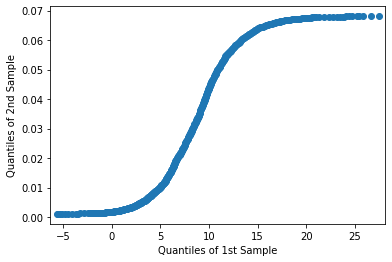

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
x = np.random.normal(loc=8.5, scale=2.5, size=37)
y = np.random.normal(loc=8.0, scale=3.0, size=37)
pp_x = sm.ProbPlot(col_Press)
pp_y = sm.ProbPlot(dist_MM_Press)
qqplot_2samples(pp_x, pp_y)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
qn_first= col_T6
qn_second=dist_MM_T6
min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Currency {curr_first}')
plt.ylabel(f'Currency {curr_second}')
plt.xlim([min_qn, 400])
plt.ylim([min_qn, 400])
plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first_list,
    yerr=conf_second_list,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()